In [2]:
import scanpy as sc
import numpy as np
import anndata as ad
import matplotlib.pyplot as plt

In [212]:
## set parameters for visualisation

sc.settings.set_figure_params(dpi=80)

# settings for the plots
sc.set_figure_params(scanpy=True, dpi=80, dpi_save=250,
                     frameon=True, vector_friendly=True,
                     color_map="YlGnBu", format='pdf', transparent=False,
                     ipython_format='png2x')

In [20]:
adata = ad.read("/home/hpc/martinez/00_projects/human/precision_toxicology/Dominic_Grun_hepatocytes_normalized_annot_feb22.h5ad")

In [21]:
adata1 = ad.read("/home/mrichter/macparland2018/macparland_annotated_hepatocytes_feb22.h5ad")

In [22]:
shared_genes = []
for elem in adata.var_names.tolist():
    if elem in adata1.var_names.tolist():
        shared_genes.append(elem)

In [23]:
adata = adata[:,shared_genes]
adata1 = adata1[:,shared_genes]

In [24]:
adata = adata.concatenate(adata1)

/home/mrichter/miniconda3/envs/scgen/lib/python3.7/site-packages/anndata/_core/merge.py:898: UserWarning: Only some AnnData objects have `.raw` attribute, not concatenating `.raw` attributes.
  UserWarning,


In [25]:
adata.write("/home/mrichter/zonation_paper/scran_normalized_combined_data_macparland_aizarani_feb22_new.h5ad")

... storing 'cell_types' as categorical
... storing 'replicate' as categorical
... storing 'louvain' as categorical
... storing 'CellName' as categorical
... storing 'Sample' as categorical
... storing 'Cell#' as categorical
... storing 'CellType' as categorical
... storing 'broad_cell_type' as categorical


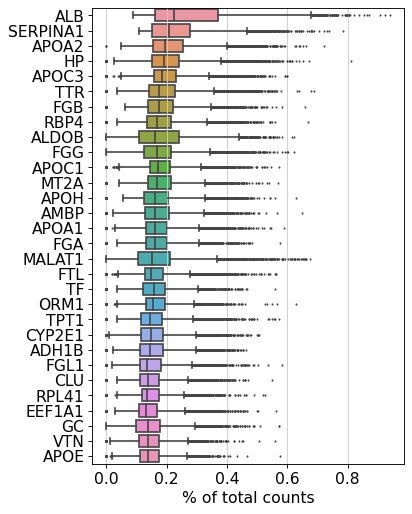

In [10]:
sc.pl.highest_expr_genes(adata)

In [26]:
del adata.obsm

In [27]:
# scgen

In [28]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.tsne(adata)
sc.tl.umap(adata)

In [29]:
sc.tl.louvain(adata, resolution=0.4)

In [30]:
adata.uns["subgroups_colors"] = ["#ff7f0e","#1f77b4","#17b2b1"]

In [32]:
adata.write("/home/mrichter/zonation_paper/normalized_combined_data_macparland_aizarani_feb22_new.h5ad")

In [33]:
adata = ad.read("/home/mrichter/zonation_paper/normalized_combined_data_macparland_aizarani_feb22_new.h5ad")

In [34]:
adata.uns["replicate_colors"] = ['#c4046e','#dcb040']

In [35]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.tsne(adata)
sc.tl.umap(adata)

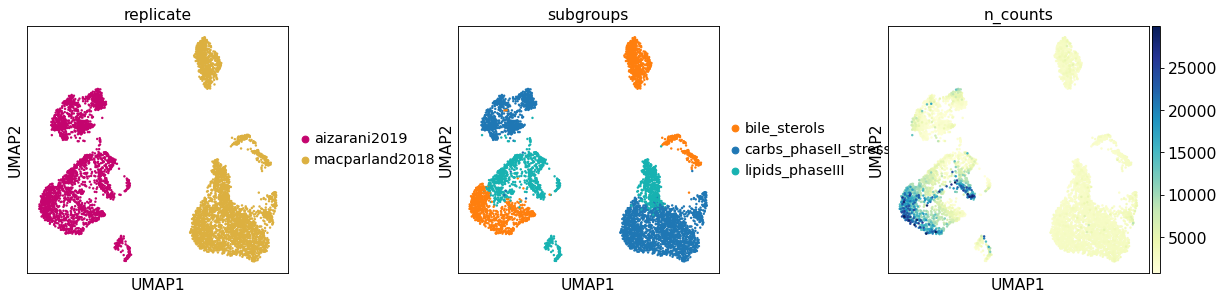

In [36]:
sc.pl.umap(adata, color=['replicate',"subgroups","n_counts"],
           ncols=3, wspace=0.5, cmap="YlGnBu",
          save="_metadata_unintegrated_macparland_aizarani_20220215.pdf")

In [17]:
# scgen

In [46]:
import anndata as ad
import scgen
import scanpy as sc

Using TensorFlow backend.


In [47]:
import pandas as pd
import numpy as np

In [48]:
## set paramteres for visualisation

sc.settings.set_figure_params(dpi=80)

# settings for the plots
sc.set_figure_params(scanpy=True, dpi=80, dpi_save=500,
                     frameon=True, vector_friendly=True,
                     color_map="YlGnBu",
                     #color_map="BuPu",
                     format='pdf', transparent=False,
                     ipython_format='png2x')

In [49]:
adata1 = ad.read("/home/mrichter/zonation_paper/scran_normalized_combined_data_macparland_aizarani_feb22_new.h5ad")

In [50]:
network = scgen.VAEArithKeras(x_dimension= adata.shape[1], model_path="./models/batch")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "VAE"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 16437)             0         
_________________________________________________________________
encoder (Model)              (None, 100)               13956200  
_________________________________________________________________
decoder (Model)              (None, 16437)             13892437  
Total params: 27,848,637
Trainable params: 27,842,237
Non-trainable params: 6,400
_________________________________________________________________


In [51]:
network.train(train_data=adata, n_epochs=50)


Epoch 1/50
6243/6243 [==============================] - 41s 7ms/step - loss: 563.8453 - kl_loss: 18610.8359 - recon_loss: 562.9147
Epoch 2/50
6243/6243 [==============================] - 39s 6ms/step - loss: 468.0608 - kl_loss: 1138.9554 - recon_loss: 468.0038
Epoch 3/50
6243/6243 [==============================] - 39s 6ms/step - loss: 450.0658 - kl_loss: 1064.3555 - recon_loss: 450.0126
Epoch 4/50
6243/6243 [==============================] - 38s 6ms/step - loss: 437.2892 - kl_loss: 1167.7133 - recon_loss: 437.2309
Epoch 5/50
6243/6243 [==============================] - 38s 6ms/step - loss: 432.3606 - kl_loss: 1210.1719 - recon_loss: 432.3002
Epoch 6/50
6243/6243 [==============================] - 37s 6ms/step - loss: 425.6940 - kl_loss: 1179.8517 - recon_loss: 425.6352
Epoch 7/50
6243/6243 [==============================] - 38s 6ms/step - loss: 421.4794 - kl_loss: 1172.9766 - recon_loss: 421.4208
Epoch 8/50
6243/6243 [==============================] - 37s 6ms/step - loss: 421.2029 - 

In [52]:
corrected_adata = scgen.batch_removal(network, adata, batch_key="replicate", cell_label_key="subgroups")

In [53]:
corrected_adata.layers["raw"] = adata1.X

In [54]:
sc.pp.neighbors(corrected_adata)
sc.tl.umap(corrected_adata)

         Falling back to preprocessing with `sc.pp.pca` and default params.


In [55]:
corrected_adata.uns["replicate_colors"] = ['#c4046e','#dcb040']

In [56]:
corrected_adata.uns["subgroups_colors"] = ["#ff7f0e","#1f77b4","#17b2b1"]

... storing 'cell_types' as categorical
... storing 'louvain' as categorical
... storing 'subgroups' as categorical
... storing 'CellName' as categorical
... storing 'Sample' as categorical
... storing 'Cell#' as categorical
... storing 'CellType' as categorical
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


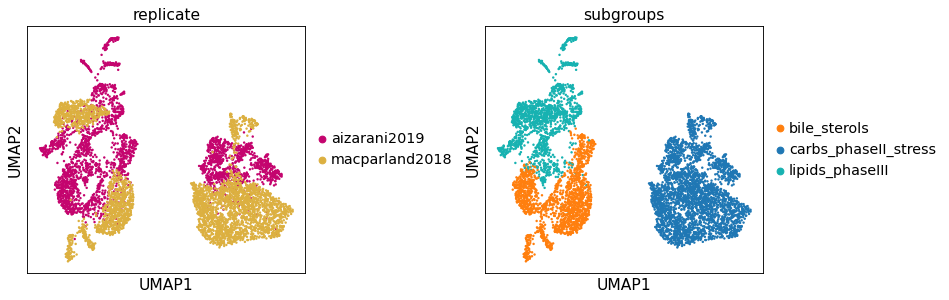

In [57]:
sc.pl.umap(corrected_adata, color=['replicate',"subgroups"],
           ncols=3, wspace=0.5,
          save="_scGen_metadata_aizarani_macparland_20220215.pdf")

In [58]:
corrected_adata.write("scgen_integration_aizarani_macparland_feb22.h5ad")

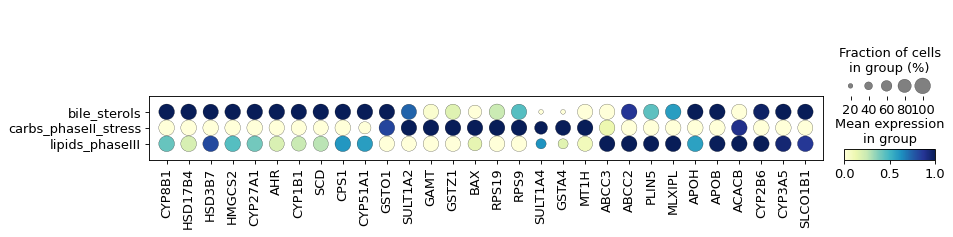

In [271]:
sc.pl.dotplot(corrected_adata, groupby="subgroups", var_names=["CYP8B1","HSD17B4","HSD3B7","HMGCS2","CYP27A1",
                                                      "AHR","CYP1B1","SCD","CPS1","CYP51A1",
                                                     
                                                     "GSTO1","SULT1A2","GAMT","GSTZ1","BAX",
                                                     "RPS19","RPS9","SULT1A4","GSTA4","MT1H",
                                                     
                                                     "ABCC3","ABCC2","PLIN5","MLXIPL","APOH",
                                                     "APOB","ACACB","CYP2B6","CYP3A5","SLCO1B1"],
                                                      
              cmap="YlGnBu",
              standard_scale="var",
              save="_macparland_aizarani_marker_genes_20220216.pdf")

In [269]:
adata = corrected_adata.copy()

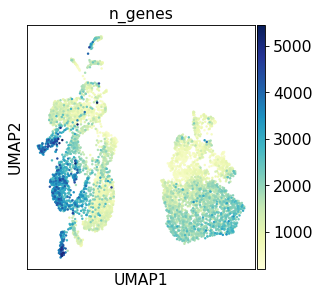

In [61]:
sc.pl.umap(adata, color="n_genes")

In [62]:
sc.pp.regress_out(adata, "n_genes")

In [63]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

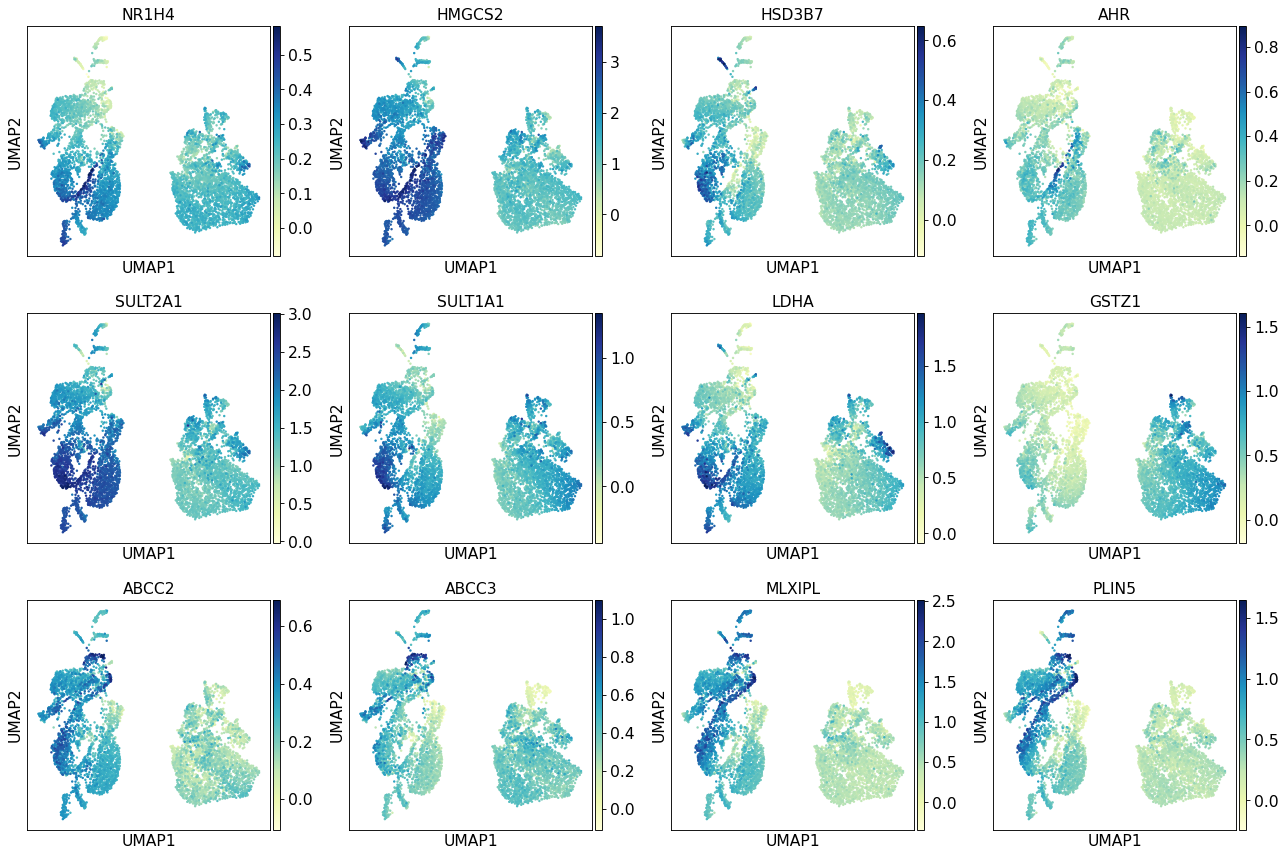

In [191]:
sc.pl.umap(adata, color=["NR1H4","HMGCS2","HSD3B7","AHR",
                          "SULT2A1","SULT1A1","LDHA","GSTZ1",
                          "ABCC2","ABCC3","MLXIPL","PLIN5"], ncols=4)

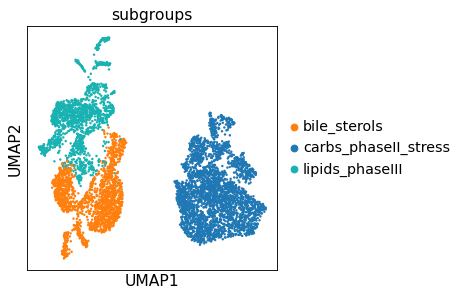

In [192]:
sc.pl.umap(adata, color="subgroups")

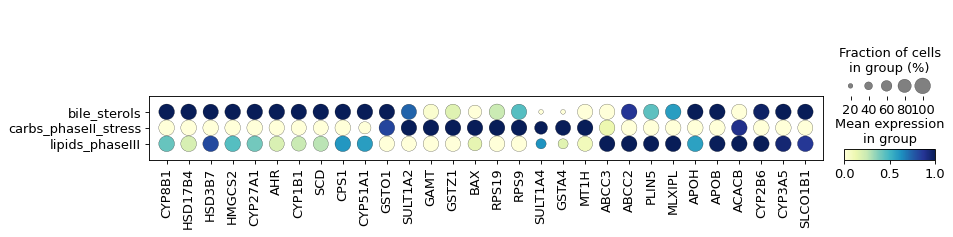

In [267]:
sc.pl.dotplot(adata, groupby="subgroups", var_names=["CYP8B1","HSD17B4","HSD3B7","HMGCS2","CYP27A1",
                                                      "AHR","CYP1B1","SCD","CPS1","CYP51A1",
                                                     
                                                     "GSTO1","SULT1A2","GAMT","GSTZ1","BAX",
                                                     "RPS19","RPS9","SULT1A4","GSTA4","MT1H",
                                                     
                                                     "ABCC3","ABCC2","PLIN5","MLXIPL","APOH",
                                                     "APOB","ACACB","CYP2B6","CYP3A5","SLCO1B1"],
                                                      
              cmap="YlGnBu",
              standard_scale="var")
              #save="_macparland_aizarani_marker_genes_20220209.pdf")

In [270]:
adata.var_names

Index(['A1BG', 'A1CF', 'A2M', 'A2M-AS1', 'A4GALT', 'A4GNT', 'AAAS', 'AACS',
       'AADAC', 'AADAT',
       ...
       'ZWILCH', 'ZWINT', 'ZXDA', 'ZXDB', 'ZXDC', 'ZYG11A', 'ZYG11B', 'ZYX',
       'ZZEF1', 'ZZZ3'],
      dtype='object', length=16437)

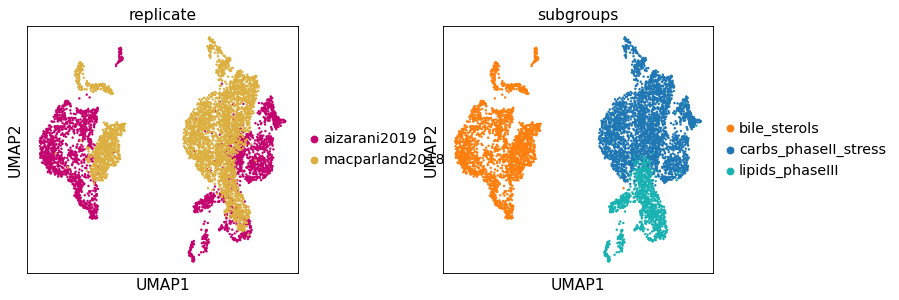

In [23]:
sc.pl.umap(adata, color=["replicate","subgroups"], wspace=0.4, 
          save="_integrated_regressed_aizarani_mcparland_scgen_20220214.pdf")